<a href="https://colab.research.google.com/github/giangdip2410/DS100_lec1/blob/master/DS100_lec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision',2)



In [0]:
import pandas as pd
students = pd.read_csv("https://raw.githubusercontent.com/DS-100/su19/master/lec/lec01/lec01-names.csv")

In [70]:
students.head()

,Name,Status
0,Aaron,Enrolled
1,Adriana,Enrolled
2,Akihiro,Enrolled
3,Allen,Enrolled
4,Andrei,Enrolled


In [71]:
students['Name'] = students["Name"].str.lower()
students.head()

,Name,Status
0,aaron,Enrolled
1,adriana,Enrolled
2,akihiro,Enrolled
3,allen,Enrolled
4,andrei,Enrolled


In [72]:
len(students)

138

In [73]:
print(f"there are {len(students)} students on the roster")

there are 138 students on the roster


In [74]:
students["Status"].value_counts().to_frame()

,Status
Enrolled,132
Waitlist,6


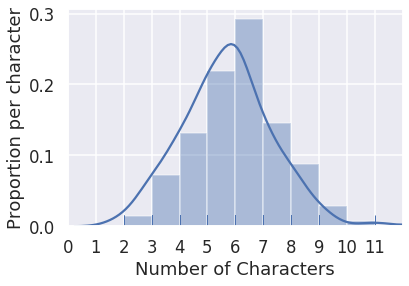

In [75]:
sns.distplot(students['Name'].str.len()
,rug=True, 
bins=np.arange(12)
,axlabel="Number of Characters" )
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.ylabel("Proportion per character");

In [76]:
#What is Name
students['Name'][5]

'andrew'

In [0]:
babynames = pd.read_csv("https://raw.githubusercontent.com/giangdip2410/su19/master/lec/lec01/babynames.csv")

In [78]:
babynames.head()

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [0]:
pivot_year_name_count = pd.pivot_table(babynames, index='Year', columns='Sex', values='Count', aggfunc=np.sum)

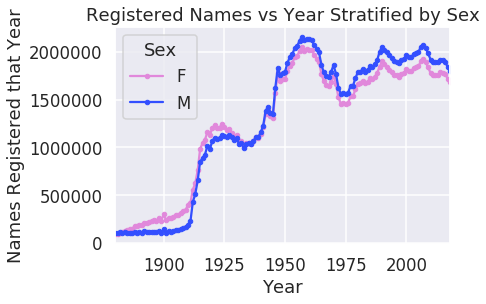

In [80]:
pink_blue = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(pink_blue)):
  pivot_year_name_count.plot(marker=".")
  plt.title("Registered Names vs Year Stratified by Sex")
  plt.ylabel("Names Registered that Year")

In [81]:
babynames["Name"] = babynames["Name"].str.lower()
babynames.head()

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880


In [82]:
sex_counts = pd.pivot_table(babynames, index="Name", columns="Sex",values="Count",aggfunc="sum",
                            fill_value=0.,margins=True)
sex_counts

Sex,F,M,All
Name,,,
aaban,0,114,114
aabha,35,0,35
aabid,0,16,16
...,...,...,...
zyyon,0,6,6
zzyzx,0,10,10
All,174079232,177573793,351653025


In [83]:
prop_female = sex_counts['F'] / sex_counts['All']
sex_counts['prop_female'] = prop_female
sex_counts

Sex,F,M,All,prop_female
Name,,,,
aaban,0,114,114,0.0
aabha,35,0,35,1.0
aabid,0,16,16,0.0
...,...,...,...,...
zyyon,0,6,6,0.0
zzyzx,0,10,10,0.0
All,174079232,177573793,351653025,0.5


In [84]:
def sex_from_name(name):
  if name in sex_counts.index :
    prop = sex_counts.loc[name, "prop_female"]
    return "F" if prop > 0.5 else "M"
  else:
    return "Name not in dataset"
sex_from_name("river")


'M'

In [85]:
interact(sex_from_name,name='same');

interactive(children=(Text(value='same', description='name'), Output()), _dom_classes=('widget-interact',))

In [0]:
students['sex'] = students['Name'].apply(sex_from_name)

In [87]:
students.head()

,Name,Status,sex
0,aaron,Enrolled,M
1,adriana,Enrolled,F
2,akihiro,Enrolled,M
3,allen,Enrolled,M
4,andrei,Enrolled,M


In [88]:
students['sex'].value_counts().to_frame().sort_index()

,sex
F,33
M,63
Name not in dataset,42


In [0]:
def avg_year(group):
  return np.average(group['Year'], weights=group['Count'])

avg_years = (babynames.groupby('Name').apply(avg_year).rename('avg_year').to_frame())


In [97]:
avg_years

,avg_name
Name,
aaban,2013.33
aabha,2013.71
aabid,2012.69
...,...
zyyanna,2010.00
zyyon,2014.00
zzyzx,2014.00


In [101]:
def year_from_name(name):
  return (avg_years.loc[name, 'avg_year']
          if name in avg_years.index
          else None)
#generate input box for you to try some names out:
interact(year_from_name, name='fernando');

interactive(children=(Text(value='fernando', description='name'), Output()), _dom_classes=('widget-interact',)…

In [102]:
students["year"] = students['Name'].apply(year_from_name)
students.head()

,Name,Status,sex,year
0,aaron,Enrolled,M,1987.35
1,adriana,Enrolled,F,1996.92
2,akihiro,Enrolled,M,1998.00
3,allen,Enrolled,M,1957.91
4,andrei,Enrolled,M,1998.13


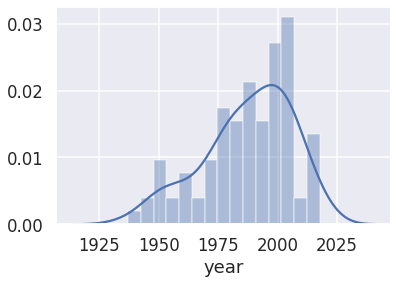

In [104]:
sns.distplot(students['year'].dropna(),bins=15);

In [105]:
students['year'].mean()

1987.5036920376108

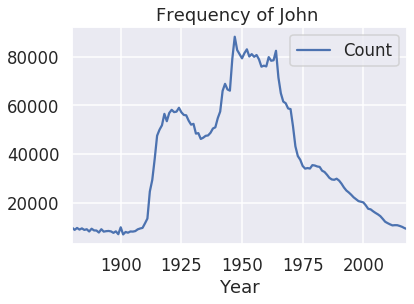

In [106]:
names = babynames.set_index('Name').sort_values('Year')
john = names.loc['john']
john[john['Sex'] == 'M'].plot('Year', 'Count')
plt.title("Frequency of John ");

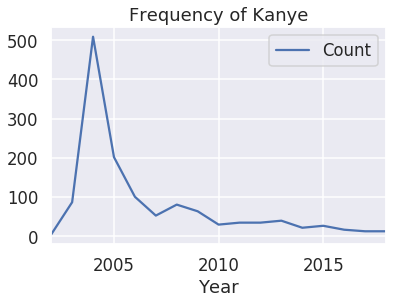

In [107]:
names = babynames.set_index("Name").sort_values("Year")
kanye = names.loc["kanye"]
kanye[kanye["Sex"] == 'M'].plot('Year', 'Count')
plt.title('Frequency of Kanye');

In [0]:
#plot by name
def plot_name(name, xlim=None, xline = None):
  names.loc[name].groupby('Year').sum().plot()
  plt.title(f'Frequency of {name}')
  if xlim: plt.xlim(xlim)
  if xline: plt.axvline(xline, c='red')

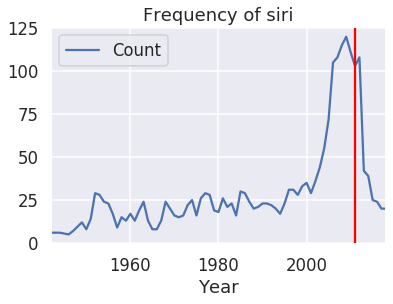

In [110]:
plot_name('siri', xline=2011)

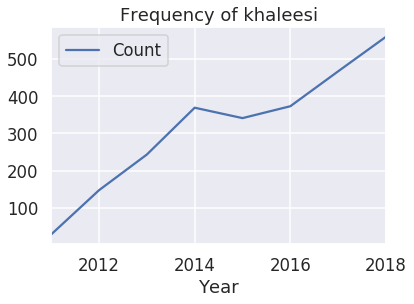

In [111]:
plot_name('khaleesi')

In [91]:
students["Name"].str.len()

0      5
1      7
2      7
      ..
135    4
136    5
137    5
Name: Name, Length: 138, dtype: int64